# The Nordic Prior Knowledge Test in Programming
**Author**: [Sondre Sæther Bolland](https://www.uib.no/personer/Sondre.S%C3%A6ther.Bolland)

**Institution**: Department of Informatics, University of Bergen

**Email**: sondre.bolland@uib.no

## Introduction
The Nordic Prior Knowledge Test in Programming is a tool for assessing students’ programming skill. The test covers the fundamental elements of introductory programming taught at different universities and university colleges in Norway and Sweden. By testing the students in the concepts found in CS1 we aim for instructors to be better able to develop and adapt their courses to this new found prior knowledge.

This Notebook is a dynamic report of the results from 2024, designed to effectivly convey the findings of the test at the start of the semester. The (static) written report will be published sometime fall 2024 here: https://programmeringstesten.no/ 

### Imports

In [307]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

### Data
Before using this notebook two python scripts need to be run. A requirement to run these scripts is to have the csv file with the original dataset: `total.csv`. This must be placed in the `data` folder in the main directory (where this Notebook is located).

`clean_data.py` cleans certain columns for ambigious data and renames columns for analysis.

`grade_submissions.py` grades each question based on the rubric (`rubric.json`).

In [308]:
!python clean_data.py
!python grade_submissions.py

Replace escape characters: dict_items([('&lt;', '<'), ('&gt;', '>'), ('&#61;', '='), ('&#34;', '"'), ('&#43;', '+')])
Replace all ambigious genders with standardized labels: ['m', 'f'] (other gender identities are not included)
1397 submissions.
Rename columns with simpler titles. Easier to use in analysis.
Removed all genders that are not in: ['m', 'f']. The other gender identities do not have a large enough sample size for valid statistical analysis.
Max score: 51.79999999999998
Submissions to be graded: 1397
Submissions graded.


### Dataset

In [309]:
# Specify the path of the data file
path = "data/"
filename = path + "results.csv"
df = pd.read_csv(filename, on_bad_lines="skip", delimiter=";", encoding="utf8")

# Remove all students who have taken a university level course
df = df[(df['UniversityExperience'] == 'Nei')]

### Filter the dataframe
Do you want to look at a specific subset of students?
Use the next cell to filter the students based on your criteria.

To reset the dataframe, simply run the cell above.

In [310]:
# Filter by institution
specific_institutions = ['UiO'] # 'UiB', 'NTNU', 'UiS', 'HvL', 'UiO', 'Kristiania', 'NMBU', 'OsloMet'
#df = df[(df['Institution'].isin(specific_institutions))]

In [311]:
# Filter by Graduate Year
specific_graduateyears = ['2023', '2024']
df = df[(df['GraduateYear'].isin(specific_graduateyears))]

In [312]:
# Filter by Gender
specific_genders = ['f', 'm', ' '] # 'f', 'm', ' '
#df = df[(df['Gender'].isin(specific_genders))]

## Demographics
See the background of the students. Note that there are a large number of submissions that are blank for some of the following items. This is due to the students submitting ambigious answers, which have not been labled correctly by `clean_data.py`.

In [313]:
# Total number of students
print(f"The dataset has {len(df['Total'])} student submissions.")

The dataset has 585 student submissions.



### Institutions

Institution
Norges teknisk-naturvitenskapelige universitet (NTNU)    267
Universitetet i Stavanger (UiS)                          139
Universitetet i Oslo (UiO)                               123
Universtitetet i Bergen (UiB)                             49
Høgskulen på Vestlandet (HVL)                              7
Name: count, dtype: int64


<Axes: ylabel='count'>

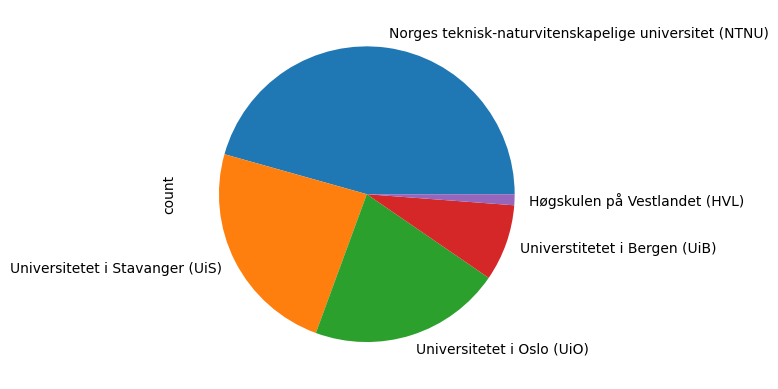

In [314]:
institutions = df.Institution.unique()

institution_column = "Institution"
print(df[institution_column].value_counts())
df[institution_column].value_counts().plot.pie()

### Graduate Year

GraduateYear
2024    322
2023    263
Name: count, dtype: int64


<Axes: ylabel='count'>

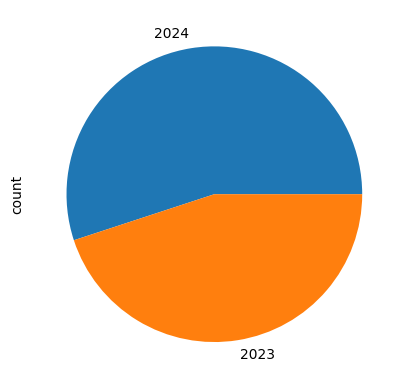

In [315]:
years = df.GraduateYear.unique()

graduateyear_column = "GraduateYear"
print(df[graduateyear_column].value_counts())
df[graduateyear_column].value_counts().plot.pie()

### Gender

Gender
m    344
f    204
      37
Name: count, dtype: int64
Gender
m    0.588034
f    0.348718
     0.063248
Name: proportion, dtype: float64


<Axes: ylabel='count'>

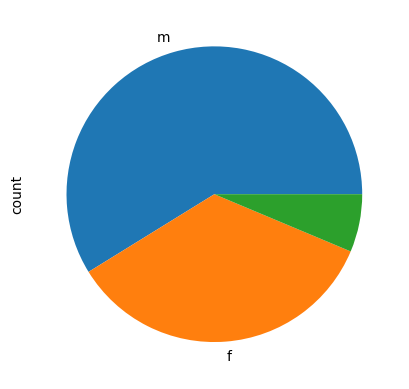

In [316]:
genders = df.Gender.unique()
gender_column = "Gender"

print(df[gender_column].value_counts())
print(df[gender_column].value_counts(normalize=True))
df[gender_column].value_counts().plot.pie()

## Educational Background
What experiences with programming do these students have? 

### Elective Programming Courses
During the secondary school phase, students have the option to take three elective courses in programming: *Information Technology 1* (IT1), *Information Technology 2* (IT2), and *Programming and Modelling X* (PMX). 

In [317]:
# Make new column for NO elective programming course
courses = ['Informasjonsteknologi 1 (IT1)', 'Informasjonsteknologi 2 (IT2)', 'Programmering og modellering X']
df_temp = df[(~df['IT1'].isin(courses))]
df_temp = df_temp[(~df_temp['IT2'].isin(courses))]
df_temp = df_temp[(~df_temp['PMX'].isin(courses))]
df_temp['NoElective'] = ~df_temp['IT1'].isin(courses)

df['NoElective'] = df_temp['NoElective']

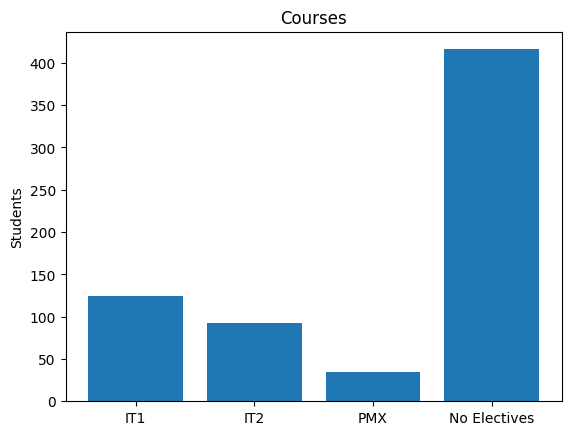

In [318]:
fig, ax = plt.subplots()

courses = ['IT1', 'IT2', 'PMX', 'No Electives']
n_it1 = df['IT1'].value_counts()['Informasjonsteknologi 1 (IT1)']
n_it2 = df['IT2'].value_counts()['Informasjonsteknologi 2 (IT2)']
n_pmx = df['PMX'].value_counts()['Programmering og modellering X']
n_noelectives = df['NoElective'].value_counts()[True]
counts = [n_it1, n_it2, n_pmx, n_noelectives]

ax.bar(courses, counts)
ax.set_ylabel('Students')
ax.set_title('Courses')

plt.show()

### Math Courses
The most common math courses available in secondary school are:
 * Practical Math 1 (1P)
 * Practical Math 2 (2P)
 * Theoretical Math 1 (1T)
 * Social Science Math 1 (S1)
 * Social Science Math 2 (S2)
 * Natural Science Math 1 (R1)
 * Natural Science Math 2 (R2)

The majority of students who took the test belonged to STEM fields, where the typical admission requirement includes S1 and S2 or R1 mathematics. Certain math-intensive study programs may also demand R2 mathematics. Notably, most students had completed the Natural Science Math courses (see plot below), which is the most advanced option.

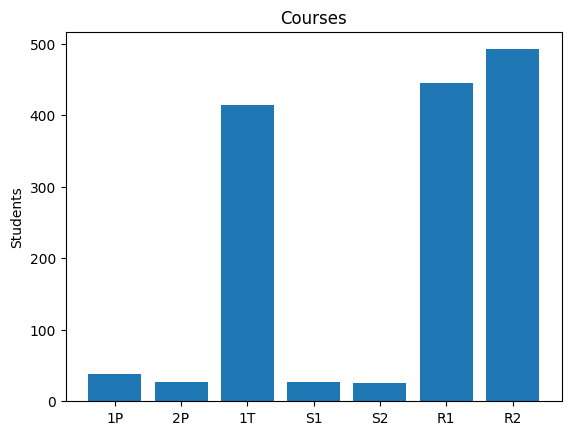

In [319]:
fig, ax = plt.subplots()

courses = ['1P', '2P', '1T', 'S1', 'S2', 'R1', 'R2']
gotten_courses = []
counts = []
for course in courses:
    try:
        count = df[course].value_counts()[course]
        counts.append(count)
        gotten_courses.append(course)
    except:
        continue

ax.bar(gotten_courses, counts)
ax.set_ylabel('Students')
ax.set_title('Courses')

plt.show()

### Experience outside of school
A source of programming knowledge is self-directed learning outside of formal education, where individuals independently explore the field, using resources like books and online materials. The following plot shows the distribution of students who report having at least 30 hours of outside experience with either block based or text based programming.

OutsideExperience
Nei    450
Ja     133
Name: count, dtype: int64
OutsideExperience
Nei    0.77187
Ja     0.22813
Name: proportion, dtype: float64


<Axes: ylabel='count'>

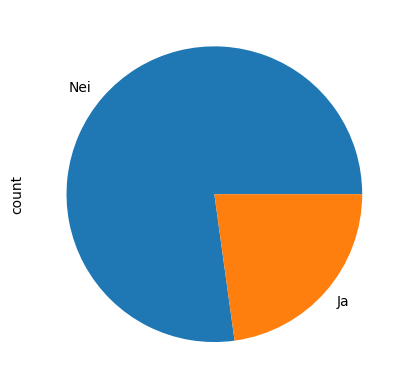

In [320]:
outside_column = "OutsideExperience"

print(df[outside_column].value_counts())
print(df[outside_column].value_counts(normalize=True))
df[outside_column].value_counts().plot.pie()

# Results
In this section of the report, the main results are presented before a review of the background the students have on the various study paths and what connection there is between background and results. Later we take a close look at how well they performed in specific programming tasks to understand their grasp of the different concepts.

In [321]:
# Configurations
bins = 25
edgecolor = 'red'
alpha = 0.5

## Main Result
A histogram of the total score of the students. Maximum score: 51.8.

Mean: 28.891
Standard deviation: 15.422


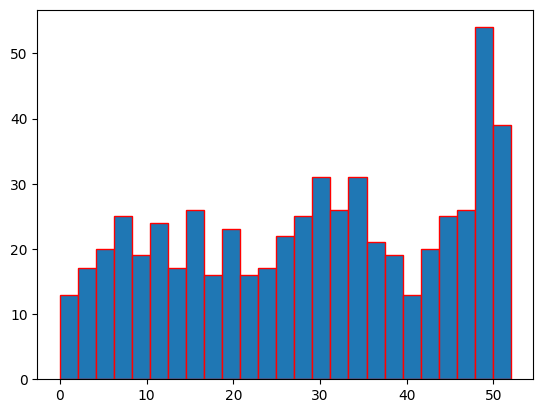

In [322]:
x = df['Total']

mean = df.loc[:, 'Total'].mean()
sd = df.loc[:, 'Total'].std()
print(f'Mean: {round(mean, 3)}')
print(f'Standard deviation: {round(sd, 3)}')


plt.hist(x, edgecolor=edgecolor, bins=bins, range=[0, 52])
plt.show() 

### Did the students find the test hard?
We asked the students to rate the test's difficulty on a Likert scale from 1 (very easy) to 7 (very hard)

<Axes: xlabel='difficulty'>

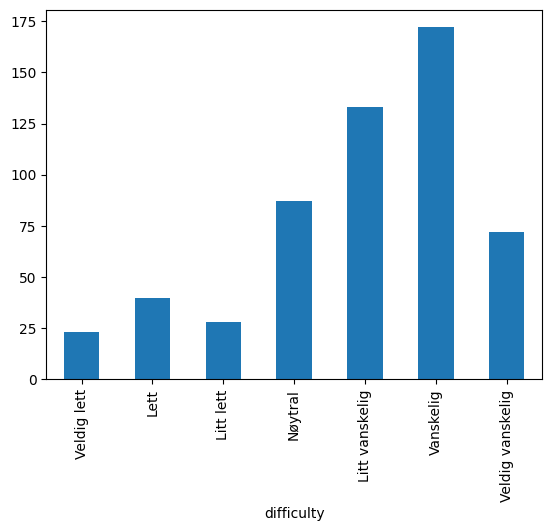

In [323]:
df['difficulty'].value_counts().loc[['Veldig lett', 'Lett', 'Litt lett', 'Nøytral', 'Litt vanskelig', 'Vanskelig', 'Veldig vanskelig']].plot.bar()

In [324]:
def compare_distributions(x, y, x_label, y_label):
    mean = x.mean()
    sd = x.std()
    print(f'Mean of {x_label}: {round(mean, 3)}')
    print(f'Standard deviation of {x_label}: {round(sd, 3)}')
    print()
    
    mean = y.mean()
    sd = y.std()
    print(f'Mean of {y_label}: {round(mean, 3)}')
    print(f'Standard deviation of {y_label}: {round(sd, 3)}')
    
    plt.hist(x, bins=bins, alpha=alpha, edgecolor=edgecolor, label=x_label, weights=np.ones(len(x)) / len(x), range=[0, 52])
    plt.hist(y, bins=bins, alpha=alpha, edgecolor=edgecolor, label=y_label, weights=np.ones(len(y)) / len(y), range=[0, 52])
    plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
    plt.legend(loc='upper right')
    plt.show()

## Prior Programming Experience in Secondary School
In the initial segment of the test, we inquired with the students regarding their prior exposure to
programming before to commencing their higher education studies.

### Graduation Year
The educational reforms outlined in LK20 were introduced in the year 2020, resulting in programming becoming a compulsory component solely for those students who graduated in 2023 and onward.

Mean of 2023 and 2024: 28.891
Standard deviation of 2023 and 2024: 15.422

Mean of before 2023: nan
Standard deviation of before 2023: nan


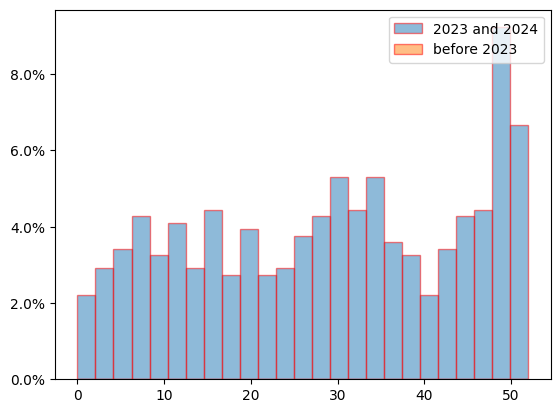

In [325]:
years = df['GraduateYear']
x = df[(years.isin(['2023', '2024']))]['Total']
y = df[(~years.isin(['2023', '2024']))]['Total']
y = y[~np.isnan(y)]

x_label = '2023 and 2024'
y_label = 'before 2023'

compare_distributions(x, y, x_label, y_label)

### Gender

Mean of women: 23.28
Standard deviation of women: 14.361

Mean of men: 32.212
Standard deviation of men: 15.0


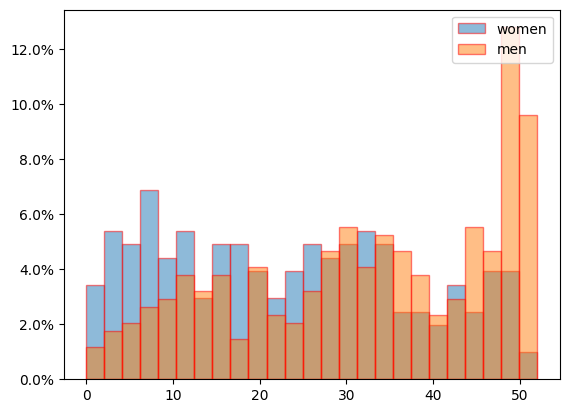

In [326]:
x = df[(df['Gender'] == 'f')]['Total']
y = df[(df['Gender'] == 'm')]['Total']

x_label = 'women'
y_label = 'men'

compare_distributions(x, y, x_label, y_label)

# Programming Tasks
Each task featured in the test pertained to a designated concept category. The following cells show the number of correct answers and the most common answers for each task.

## Correctness rate for each concept category
Below you can find the percentage of accurate responses achieved by the students for each concept.

Note that performance within each category may not exclusively reflect the students’ mastery of that programming concept. Variability in task difficulty plays a substantial role, with some tasks naturally being easier than others, irrespective of the underlying concept.

In [327]:
def correctnes_rate(columns, category, task_weight=1):
    correct_answer_rate = 0
    for column in columns:
        points_column = column + "_points"
        task_mean = df.loc[:, points_column].mean()
        correct_answer_rate += task_mean
    correct_answer_rate /= len(columns)*task_weight
    print(f'{category:15s} {correct_answer_rate*100:3.2f} %')

In [328]:
print("The students have the following average correctness rate for each concept category:")

# Datatypes
datatype_columns = ['datatypes1', 'datatypes2', 'datatypes3', 'datatypes4']
correctnes_rate(datatype_columns, "Datatypes")

# Booleans
boolean_columns = ["100 == 100", "2 > 7", "(10 + 3) >= 13", "(10*2) < 9", "(1 + 3) < (2*3)", "(10.3 + 9) == (10.3 + 10)",	"100 != 100", "(5 < 7) and (4 > 5)", "(5 < 7) or (4 > 5)", "(3 < 7) and (7 < 9)", "(3 < 7) or (7 < 9)", "not (100 != 100)", "True != True", "True and False", "True or False" , "True and True", "True or True", "not (True != True)", "n < 10", "100 == n", "(n < 7) and (4 > n)", "(n < 7) or (4 > n)", "n <= 5", "not (n < 10)"]
correctnes_rate(boolean_columns, "Booleans", task_weight=0.2)

# Variables
variable_columns = ["Variables1a", "Variables1b", "Variables2a", "Variables2b", "Variables3a", "Variables3b", "Variables4a", "Variables4b", "Variables5a", "Variables5b", "Variables5c", "Variables6a", "Variables6b", "Variables6c"]
correctnes_rate(variable_columns, "Variables")

# Conditionals
conditional_columns = ["Conditionals1", "Conditionals2", "Conditionals3", "Conditionals4"]
correctnes_rate(conditional_columns, "Conditionals")

# Loops
loop_columns = ["Loops1", "Loops2", "Loops3", "Loops4", "Loops5", "Loops6", "Loops7"]
correctnes_rate(loop_columns, "Loops")

# Lists
list_columns = ["Lists1", "Lists2", "Lists3a", "Lists3b"]
correctnes_rate(list_columns, "Lists")

# Functions
function_columns = ["Functions1", "Functions2", "Functions3", "Functions4", "Functions5", "Functions6", "Functions7", "Functions8", "Functions9"]
correctnes_rate(function_columns, "Functions")

The students have the following average correctness rate for each concept category:
Datatypes       65.34 %
Booleans        71.62 %
Variables       66.20 %
Conditionals    71.03 %
Loops           41.86 %
Lists           44.15 %
Functions       30.98 %


## Tasks
To gain a deeper understanding of the students’ knowledge and comprehension of specific programming concepts, it is important to analyze their performance on these concepts. 

In [329]:
def print_task_result(task_column, df, n_answers=5, verbose_correct_answers=True):
    '''
    Print number of correct (1) and incorrect (0) responses.
    Print the top 5 most common answers.
    '''
    if verbose_correct_answers:
        task_point_column = task_column + "_points"
        print("Number of correct responses:")
        print(df[task_point_column].value_counts())
        print()
    
    print(f"Top {n_answers} most common answers:")
    try:
        print(df[task_column].value_counts()[:n_answers])
    except:
        print(df[task_column].value_counts())

# Datatypes
What datatype do the following variables have?
```python
a = 123
b = 1.23
c = '123'
d = [1, 2, 3]
```

In [330]:
print_task_result("datatypes1", df, 6, True)
print()
print_task_result("datatypes2", df, 6, True)
print()
print_task_result("datatypes3", df, 6, True)
print()
print_task_result("datatypes4", df, 6, True)

Number of correct responses:
datatypes1_points
1    357
0    228
Name: count, dtype: int64

Top 6 most common answers:
datatypes1
int             357
Jeg vet ikke    130
str              45
float            35
bool             11
list              5
Name: count, dtype: int64

Number of correct responses:
datatypes2_points
1    372
0    213
Name: count, dtype: int64

Top 6 most common answers:
datatypes2
float           372
Jeg vet ikke    123
int              42
str              29
bool             10
list              4
Name: count, dtype: int64

Number of correct responses:
datatypes3_points
1    308
0    277
Name: count, dtype: int64

Top 6 most common answers:
datatypes3
str             308
Jeg vet ikke    184
bool             32
int              30
float            22
list              3
Name: count, dtype: int64

Number of correct responses:
datatypes4_points
1    492
0     93
Name: count, dtype: int64

Top 6 most common answers:
datatypes4
list            492
Jeg vet ikke     80

# Operators

### Operators 1
What is the value of `result`?
```python
a = 12
result = a + a
```

In [331]:
print_task_result("Operators1", df, 4, True)

Number of correct responses:
Operators1_points
1    523
0     62
Name: count, dtype: int64

Top 4 most common answers:
Operators1
24.0            523
I don't know     20
12.0             10
1212.0            7
Name: count, dtype: int64


### Operators 2
What is the value of `result`?
```python
a = 12
b = 1.23 

result = b + a
```

In [332]:
print_task_result("Operators2", df, 4, True)

Number of correct responses:
Operators2_points
1    450
0    135
Name: count, dtype: int64

Top 4 most common answers:
Operators2
13.23           450
I don't know     41
12.23             4
1.2312            4
Name: count, dtype: int64


### Operators 3
What is the value of `result`?
```python
c = '123'
result = c + c
```

In [333]:
print_task_result("Operators3", df, 4, True)

Number of correct responses:
Operators3_points
0    346
1    239
Name: count, dtype: int64

Top 4 most common answers:
Operators3
123123.0        239
I don't know     74
246.0            39
0.0               2
Name: count, dtype: int64


### Operators 4
What is printed here?
```python
n = 0
n = n + 1
n = n + 1

print(n)
```

In [334]:
print_task_result("Operators4", df, 4, True)

Number of correct responses:
Operators4_points
1    463
0    122
Name: count, dtype: int64

Top 4 most common answers:
Operators4
2.0             463
I don't know     48
1.0              18
3.0              10
Name: count, dtype: int64


### Operators 5
What is printed here?
```python
n = 'b'
n = n + 'c'
n = n + 'a'

print(n)
```

In [335]:
print_task_result("Operators5", df, 4, True)

Number of correct responses:
Operators5_points
0    361
1    224
Name: count, dtype: int64

Top 4 most common answers:
Operators5
bca             217
I don't know    141
'bca'             9
b c a             7
Name: count, dtype: int64


# Variables

### Variables 1
What is the value of variables `a` and `b`?
```python
a = 10
b = 20

a = b
```

In [336]:
print_task_result("Variables1a", df)
print_task_result("Variables1b", df)

Number of correct responses:
Variables1a_points
1    432
0    153
Name: count, dtype: int64

Top 5 most common answers:
Variables1a
20.0    432
10.0     31
1.0       1
15.0      1
10.2      1
Name: count, dtype: int64
Number of correct responses:
Variables1b_points
1    426
0    159
Name: count, dtype: int64

Top 5 most common answers:
Variables1b
20.0            426
I don't know    122
10.0             30
2.0               2
15.0              1
Name: count, dtype: int64


### Variables 2
What is the value of variables `a` and `b`?
```python
a = 10
b = 20

b = a
```

In [337]:
print_task_result("Variables2a", df)
print_task_result("Variables2b", df)

Number of correct responses:
Variables2a_points
1    414
0    171
Name: count, dtype: int64

Top 5 most common answers:
Variables2a
10.0    414
20.0     28
2.0       2
30.0      1
0.0       1
1.0       1
Name: count, dtype: int64
Number of correct responses:
Variables2b_points
1    406
0    179
Name: count, dtype: int64

Top 5 most common answers:
Variables2b
10.0            406
I don't know    138
20.0             36
1.0               1
0.0               1
Name: count, dtype: int64


### Variables 3
What is the value of variables `a` and `b`?
```python
a = 10
b = 20

a = b
b = a
```

In [338]:
print_task_result("Variables3a", df)
print_task_result("Variables3b", df)

Number of correct responses:
Variables3a_points
1    404
0    181
Name: count, dtype: int64

Top 5 most common answers:
Variables3a
20.0    404
10.0     23
29.0      1
1.0       1
0.0       1
15.0      1
Name: count, dtype: int64
Number of correct responses:
Variables3b_points
1    346
0    239
Name: count, dtype: int64

Top 5 most common answers:
Variables3b
20.0            346
I don't know    154
10.0             78
2.0               1
0.0               1
Name: count, dtype: int64


### Variables 4
What is the value of variables `a` and `b`?
```python
a = 10
b = 20

b = a
a = b
```

In [339]:
print_task_result("Variables4a", df)
print_task_result("Variables4b", df)

Number of correct responses:
Variables4a_points
1    359
0    226
Name: count, dtype: int64

Top 5 most common answers:
Variables4a
10.0    359
20.0     62
1.0       1
Name: count, dtype: int64
Number of correct responses:
Variables4b_points
1    385
0    200
Name: count, dtype: int64

Top 5 most common answers:
Variables4b
10.0            385
I don't know    156
20.0             36
2.0               1
Name: count, dtype: int64


### Variables 5
What is the value of variables `a`, `b` and `c`?
```python
a = 10
b = 20
c = 30

a = b
b = c
```

In [340]:
print_task_result("Variables5a", df)
print_task_result("Variables5b", df)
print_task_result("Variables5c", df)

Number of correct responses:
Variables5a_points
1    396
0    189
Name: count, dtype: int64

Top 5 most common answers:
Variables5a
20.0    396
30.0     22
10.0     14
1.0       2
Name: count, dtype: int64
Number of correct responses:
Variables5b_points
1    411
0    174
Name: count, dtype: int64

Top 5 most common answers:
Variables5b
30.0    411
20.0      9
10.0      9
2.0       2
15.0      2
3.0       1
Name: count, dtype: int64
Number of correct responses:
Variables5c_points
1    403
0    182
Name: count, dtype: int64

Top 5 most common answers:
Variables5c
30.0            403
I don't know    148
20.0             16
10.0              7
3.0               2
Name: count, dtype: int64


### Variables 6
What is the value of variables `a`, `b` and `c`?
```python
a = 10
b = 20
c = 30

a = c
b = a
c = b
```

In [341]:
print_task_result("Variables6a", df)
print_task_result("Variables6b", df)
print_task_result("Variables6c", df)

Number of correct responses:
Variables6a_points
1    393
0    192
Name: count, dtype: int64

Top 5 most common answers:
Variables6a
30.0    393
20.0     15
10.0      7
6.0       1
5.0       1
Name: count, dtype: int64
Number of correct responses:
Variables6b_points
1    327
0    258
Name: count, dtype: int64

Top 5 most common answers:
Variables6b
30.0    327
10.0     80
20.0      8
Name: count, dtype: int64
Number of correct responses:
Variables6c_points
1    320
0    265
Name: count, dtype: int64

Top 5 most common answers:
Variables6c
30.0            320
I don't know    157
20.0             71
10.0             23
Name: count, dtype: int64


## Booleans

### Booleans 1
What do these boolean expressions evaluate to?

In [342]:
print_task_result("100 == 100", df, 3, False)
print()
print_task_result("2 > 7", df, 3, False)
print()
print_task_result("(10 + 3) >= 13", df, 3, False)
print()
print_task_result("(10*2) < 9", df, 3, False)
print()
print_task_result("(1 + 3) < (2*3)", df, 3, False)
print()
print_task_result("(10.3 + 9) == (10.3 + 10)", df, 3, False)

Top 3 most common answers:
100 == 100
True            529
Jeg vet ikke     42
False             9
Name: count, dtype: int64

Top 3 most common answers:
2 > 7
False           554
Jeg vet ikke     14
True             10
Name: count, dtype: int64

Top 3 most common answers:
(10 + 3) >= 13
True            481
False            66
Jeg vet ikke     31
Name: count, dtype: int64

Top 3 most common answers:
(10*2) < 9
False           544
Jeg vet ikke     17
True             16
Name: count, dtype: int64

Top 3 most common answers:
(1 + 3) < (2*3)
True            536
False            24
Jeg vet ikke     19
Name: count, dtype: int64

Top 3 most common answers:
(10.3 + 9) == (10.3 + 10)
False           510
Jeg vet ikke     50
True             21
Name: count, dtype: int64


### Booleans 2
What do these boolean expressions evaluate to?

In [343]:
print_task_result("100 != 100", df, 3, False)
print()
print_task_result("(5 < 7) and (4 > 5)", df, 3, False)
print()
print_task_result("(5 < 7) or (4 > 5)", df, 3, False)
print()
print_task_result("(3 < 7) and (7 < 9)", df, 3, False)
print()
print_task_result("(3 < 7) or (7 < 9)", df, 3, False)
print()
print_task_result("not (100 != 100)", df, 3, False)

Top 3 most common answers:
100 != 100
False           373
Jeg vet ikke    182
True             23
Name: count, dtype: int64

Top 3 most common answers:
(5 < 7) and (4 > 5)
False           498
Jeg vet ikke     64
True             16
Name: count, dtype: int64

Top 3 most common answers:
(5 < 7) or (4 > 5)
True            362
False           115
Jeg vet ikke     99
Name: count, dtype: int64

Top 3 most common answers:
(3 < 7) and (7 < 9)
True            500
Jeg vet ikke     66
False             8
Name: count, dtype: int64

Top 3 most common answers:
(3 < 7) or (7 < 9)
True            407
Jeg vet ikke     98
False            74
Name: count, dtype: int64

Top 3 most common answers:
not (100 != 100)
True            286
Jeg vet ikke    261
False            32
Name: count, dtype: int64


### Booleans 3
What do these boolean expressions evaluate to?

In [344]:
print_task_result("True != True", df, 3, False)
print()
print_task_result("True and False", df, 3, False)
print()
print_task_result("True or False", df, 3, False)
print()
print_task_result("True and True", df, 3, False)
print()
print_task_result("True or True", df, 3, False)
print()
print_task_result("not (True != True)", df, 3, False)

Top 3 most common answers:
True != True
False           317
Jeg vet ikke    229
True             28
Name: count, dtype: int64

Top 3 most common answers:
True and False
False           290
Jeg vet ikke    247
True             36
Name: count, dtype: int64

Top 3 most common answers:
True or False
True            316
Jeg vet ikke    228
False            28
Name: count, dtype: int64

Top 3 most common answers:
True and True
True            332
Jeg vet ikke    204
False            36
Name: count, dtype: int64

Top 3 most common answers:
True or True
True            263
Jeg vet ikke    215
False            93
Name: count, dtype: int64

Top 3 most common answers:
not (True != True)
Jeg vet ikke    297
True            238
False            38
Name: count, dtype: int64


### Booleans 4
Given the variable `n = 5`, what do these boolean expressions evaluate to?

In [345]:
print_task_result("n < 10", df, 3, False)
print()
print_task_result("100 == n", df, 3, False)
print()
print_task_result("(n < 7) and (4 > n)", df, 3, False)
print()
print_task_result("(n < 7) or (4 > n)", df, 3, False)
print()
print_task_result("n <= 5", df, 3, False)
print()
print_task_result("not (n < 10)", df, 3, False)

Top 3 most common answers:
n < 10
True            522
False            29
Jeg vet ikke     28
Name: count, dtype: int64

Top 3 most common answers:
100 == n
False           506
Jeg vet ikke     63
True              9
Name: count, dtype: int64

Top 3 most common answers:
(n < 7) and (4 > n)
False           490
Jeg vet ikke     50
True             34
Name: count, dtype: int64

Top 3 most common answers:
(n < 7) or (4 > n)
True            394
False           107
Jeg vet ikke     74
Name: count, dtype: int64

Top 3 most common answers:
n <= 5
True            473
Jeg vet ikke     55
False            51
Name: count, dtype: int64

Top 3 most common answers:
not (n < 10)
False           334
Jeg vet ikke    180
True             62
Name: count, dtype: int64


## Conditionals

### Conditionals 1
What does this code snippet print?

```python
if 2 > 7:
    print(1)
```

In [346]:
print_task_result("Conditionals1", df)

Number of correct responses:
Conditionals1_points
1    475
0    110
Name: count, dtype: int64

Top 5 most common answers:
Conditionals1
Ingenting       475
1                62
Jeg vet ikke     44
Name: count, dtype: int64


### Conditionals 2
What does this code snippet print?

```python
if 100 != 100:
    print(1)
else:
    print(2)
```

In [347]:
print_task_result("Conditionals2", df)

Number of correct responses:
Conditionals2_points
1    362
0    223
Name: count, dtype: int64

Top 5 most common answers:
Conditionals2
2               362
Jeg vet ikke    156
1                35
1 og 2           14
Ingenting        13
Name: count, dtype: int64


### Conditionals 3
What does this code snippet print?

```python
if (10*2) < 9:
    print(1)
elif 100 == 100:
    print(2)
else:
    print(3)
```

In [348]:
print_task_result("Conditionals3", df)

Number of correct responses:
Conditionals3_points
1    423
0    162
Name: count, dtype: int64

Top 5 most common answers:
Conditionals3
2               423
Jeg vet ikke     73
2 og 3           34
3                15
1 og 2           14
Name: count, dtype: int64


### Conditionals 4
What does this code snippet print?

```python
if 100 == 100:
    print(1)
if (1 + 3) < (2*3):
    print(2)
else:
    print(3)
```

In [349]:
print_task_result("Conditionals4", df)

Number of correct responses:
Conditionals4_points
1    402
0    183
Name: count, dtype: int64

Top 5 most common answers:
Conditionals4
1 og 2          402
Jeg vet ikke     76
1                47
1 og 3           16
2                13
Name: count, dtype: int64


## Loops

### Loops 1
What does this code snippet print?

```python
n = 0
while n < 10:
    n = n + 1

print(n)
```

In [350]:
print_task_result("Loops1", df)

Number of correct responses:
Loops1_points
0    310
1    275
Name: count, dtype: int64

Top 5 most common answers:
Loops1
10.0            275
9.0              91
I don't know     79
1.0              46
123456789.0      37
Name: count, dtype: int64


### Loops 2
What does this code snippet print?

```python
n = 0
while n < 10:
    n = n + 2

print(n)
```

In [351]:
print_task_result("Loops2", df)

Number of correct responses:
Loops2_points
0    332
1    253
Name: count, dtype: int64

Top 5 most common answers:
Loops2
10.0            253
8.0              84
I don't know     78
2.0              47
2468.0           39
Name: count, dtype: int64


### Loops 3
What does this code snippet print?

```python
n = 100
while n < 10:
    n = n + 2

print(n)
```

In [352]:
print_task_result("Loops3", df)

Number of correct responses:
Loops3_points
1    381
0    204
Name: count, dtype: int64

Top 5 most common answers:
Loops3
100             381
I don't know    123
0                25
102              14
98                5
Name: count, dtype: int64


### Loops 4
What does this code snippet print?

```python
n = 0
while (n < 7) and (4 > n):
    n = n + 1

print(n)
```

In [353]:
print_task_result("Loops4", df)

Number of correct responses:
Loops4_points
0    349
1    236
Name: count, dtype: int64

Top 5 most common answers:
Loops4
4.0             236
I don't know    128
3.0              70
1.0              35
0.0              31
Name: count, dtype: int64


### Loops 5
What does this code snippet print?

```python
n = 0
ls = [1, 1, 3]
for e in ls:
    n = n + e

print(n)
```

In [354]:
print_task_result("Loops5", df)

Number of correct responses:
Loops5_points
0    368
1    217
Name: count, dtype: int64

Top 5 most common answers:
Loops5
I don't know    312
5.0             217
0.0              16
3.0               6
125.0             6
Name: count, dtype: int64


### Loops 6
What does this code snippet print?

```python
n = 0
ls = [-1, 4, -3, 0, -10, 5]
for e in ls:
    if e > 0:
        n = n + e

print(n)
```

In [355]:
print_task_result("Loops6", df)

Number of correct responses:
Loops6_points
0    395
1    190
Name: count, dtype: int64

Top 5 most common answers:
Loops6
I don't know    328
9.0             190
0.0              17
5.0               6
4.5               4
Name: count, dtype: int64


## Lists

### Lists 1
What does this code snippet print?

```python
ls = [10, 20, 30]
print(ls[1])
```

In [356]:
print_task_result("Lists1", df)

Number of correct responses:
Lists1_points
0    358
1    227
Name: count, dtype: int64

Top 5 most common answers:
Lists1
20.0            227
I don't know    176
10.0            159
102030.0         10
101.0             1
Name: count, dtype: int64


### Lists 2
What does this code snippet print?

```python
ls = [10, 20, 30]
ls[1] = ls[1] + 5

print(ls[1])
```

In [357]:
print_task_result("Lists2", df)

Number of correct responses:
Lists2_points
0    357
1    228
Name: count, dtype: int64

Top 5 most common answers:
Lists2
25.0            228
I don't know    190
15.0            140
10.0              4
152535.0          4
Name: count, dtype: int64


### Lists 3
What does this code snippet print?

```python
a = [10, 20, 30]
b = [5, 15, 25]

b[1] = a[1] + b[1]

print(a)
print(b)
```

In [358]:
print_task_result("Lists3a", df)
print_task_result("Lists3b", df)

Number of correct responses:
Lists3a_points
1    375
0    210
Name: count, dtype: int64

Top 5 most common answers:
Lists3a
[10, 20, 30]    375
Jeg vet ikke    157
[15, 35, 55]      8
[5, 15, 25]       4
[10, 35, 30]      3
Name: count, dtype: int64
Number of correct responses:
Lists3b_points
0    382
1    203
Name: count, dtype: int64

Top 5 most common answers:
Lists3b
Jeg vet ikke    217
[5, 35, 25]     203
[15, 35, 55]     94
[5, 15, 25]      31
[10, 35, 30]     10
Name: count, dtype: int64


## Functions

### Functions 1
What does this code snippet print?

```python
def f(a, b):
    return a + b

print(f(5, 10))
```

In [359]:
print_task_result("Functions1", df)

Number of correct responses:
Functions1_points
1    357
0    228
Name: count, dtype: int64

Top 5 most common answers:
Functions1
15.0            357
I don't know    197
5.1               5
510.0             4
5678910.0         1
Name: count, dtype: int64


### Functions 2
What does this code snippet print?

```python
def f(a):
    if a:
        return 1
    else:
        return 2

print(f(100 == 100))
```

In [360]:
print_task_result("Functions2", df)

Number of correct responses:
Functions2_points
0    348
1    237
Name: count, dtype: int64

Top 5 most common answers:
Functions2
I don't know    290
1.0             237
2.0              21
100.0            12
99.0              1
Name: count, dtype: int64


### Functions 3
What does this code snippet print?

```python
def f():
    if 100 == 100:
        return 1
    if (1 + 3) < (2*3):
        return 2
    else:
        return 3

print(f())
```

In [361]:
print_task_result("Functions3", df)

Number of correct responses:
Functions3_points
0    459
1    126
Name: count, dtype: int64

Top 5 most common answers:
Functions3
I don't know    282
1.0             126
12.0             74
1.2              31
2.0              19
Name: count, dtype: int64


### Functions 4
What does this code snippet print?

```python
def f(n, a):
    if a:
        n = n + 1
    return n

print(f(5, (10*2) < 9))
```

In [362]:
print_task_result("Functions4", df)

Number of correct responses:
Functions4_points
0    412
1    173
Name: count, dtype: int64

Top 5 most common answers:
Functions4
I don't know    357
5.0             173
6.0              12
9.0               1
5209.0            1
Name: count, dtype: int64


### Functions 5
What does this code snippet print?

```python
def f(n):
    while n < 10:
        n = n + 1
    return n

print(f(5))
```

In [363]:
print_task_result("Functions5", df)

Number of correct responses:
Functions5_points
0    387
1    198
Name: count, dtype: int64

Top 5 most common answers:
Functions5
I don't know    225
10.0            198
6.0              52
9.0              33
5.0              20
Name: count, dtype: int64


### Functions 6
What does this code snippet print?

```python
def f(s, ls):
    for e in ls:
        s = s + e
    return s

print(f('abc', ['x', 'y', 'z']))
```

In [364]:
print_task_result("Functions6", df)

Number of correct responses:
Functions6_points
0    437
1    148
Name: count, dtype: int64

Top 5 most common answers:
Functions6
I don't know    381
abcxyz          145
abc x y z         5
abcxabcyabcz      4
Abcxyz            3
Name: count, dtype: int64


### Functions 7
What does this code snippet print?

```python
def f(n, ls):
    return ls[n]

print(f(2, ['a', 'b', 'c']))
```

In [365]:
print_task_result("Functions7", df)

Number of correct responses:
Functions7_points
0    415
1    170
Name: count, dtype: int64

Top 5 most common answers:
Functions7
I don't know    351
c               164
b                17
C                 6
2, b, c           1
Name: count, dtype: int64


### Functions 8
What does this code snippet print?

```python
def f(n, ls):
    return ls[1] + n

print(f(5, [10, 20, 30]))
```

In [366]:
print_task_result("Functions8", df)

Number of correct responses:
Functions8_points
0    405
1    180
Name: count, dtype: int64

Top 5 most common answers:
Functions8
I don't know    338
25.0            180
15.0             21
152535.0          4
65.0              2
Name: count, dtype: int64


### Functions 9
What does this code snippet print?

```python
def f(n, ls):
    for e in ls:
        ls[n] = ls[n] + e
    return ls[n]

print(f(1, [10, 20, 30]))
```

In [367]:
print_task_result("Functions9", df)

Number of correct responses:
Functions9_points
0    543
1     42
Name: count, dtype: int64

Top 5 most common answers:
Functions9
I don't know    384
80.0             64
90.0             42
23.0             10
21.0              9
Name: count, dtype: int64
